# Analysis Assignment 1 - Part B Air BnB

### Loading required libraries

In [2]:
##Import Required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Consolidated Data File

In [3]:
data = pd.read_csv("AirBnB Dec 2023 - Listings(Consolidated).csv")        
print(data)
data = data.apply(lambda x: x.str.replace(',', '') if x.dtype == 'object' else x)
data['price'].fillna(data.mean(), inplace=True)

               id                                               name  \
0           12899  Rental unit in Portland ¬∑ ‚òÖ4.93 ¬∑ 2 bedroo...   
1           37676  Loft in Portland ¬∑ ‚òÖ4.89 ¬∑ 1 bedroom ¬∑ 1 ...   
2           61677  Home in Portland ¬∑ ‚òÖ4.74 ¬∑ 1 bedroom ¬∑ 2 ...   
3           61893  Condo in Portland ¬∑ ‚òÖ5.0 ¬∑ 1 bedroom ¬∑ 1 ...   
4           67036  Guesthouse in Portland ¬∑ ‚òÖ4.96 ¬∑ 4 bedroom...   
...           ...                                                ...   
4940  1,04862E+18  Townhouse in Portland ¬∑ ‚òÖNew ¬∑ 3 bedrooms ...   
4941   1,0493E+18  Tiny home in Portland ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬...   
4942  1,04936E+18  Rental unit in Portland ¬∑ ‚òÖNew ¬∑ 1 bedroom...   
4943  1,04945E+18  Home in Portland ¬∑ ‚òÖNew ¬∑ 1 bedroom ¬∑ 1 bath   
4944  1,05012E+18  Home in Portland ¬∑ ‚òÖNew ¬∑ 3 bedrooms ¬∑ 3 ...   

        host_id      host_name          neighbourhood  \
0         49682  Ali And David              Concordia   
1        162158      

C:\Users\khoul\AppData\Local\Temp\ipykernel_22008\1782966379.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data['price'].fillna(data.mean(), inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4945 non-null   object 
 1   name                            4945 non-null   object 
 2   host_id                         4945 non-null   int64  
 3   host_name                       4945 non-null   object 
 4   neighbourhood                   4945 non-null   object 
 5   neighbourhood_association       4905 non-null   object 
 6   homeownership_percentage        4945 non-null   object 
 7   homeownership_rank              4945 non-null   int64  
 8   diversity_percentage            4945 non-null   object 
 9   diversity_rank                  4945 non-null   int64  
 10  poverty_percentage              4945 non-null   object 
 11  poverty_rank                    4945 non-null   int64  
 12  trees_percentage                49

### qst1. Should the company focus on being a short-term, long-term, or a hybrid rental company

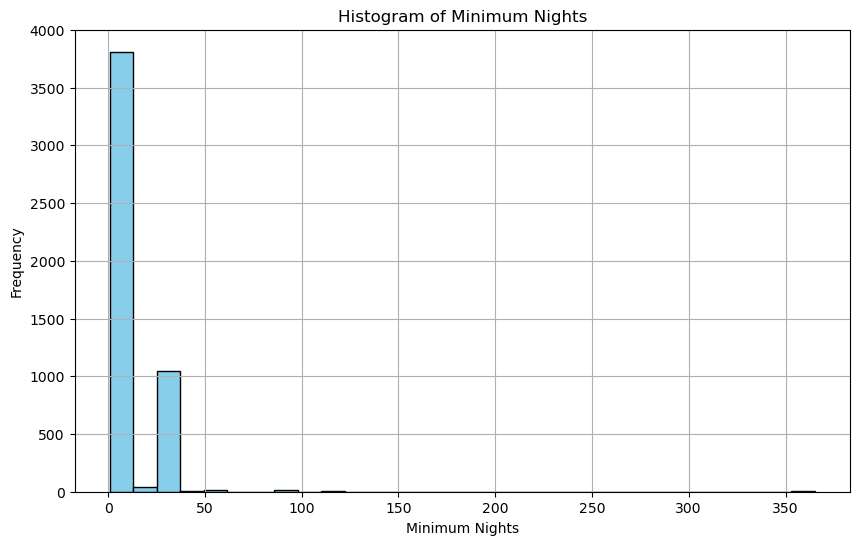

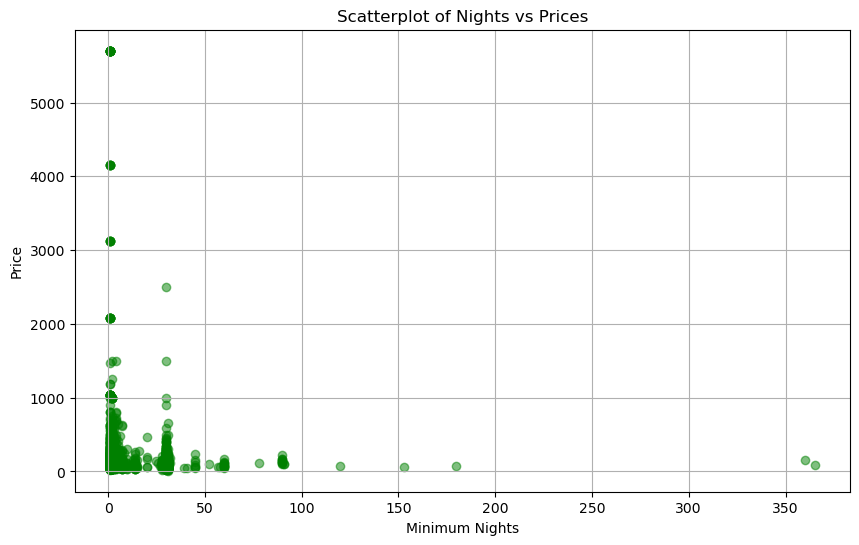

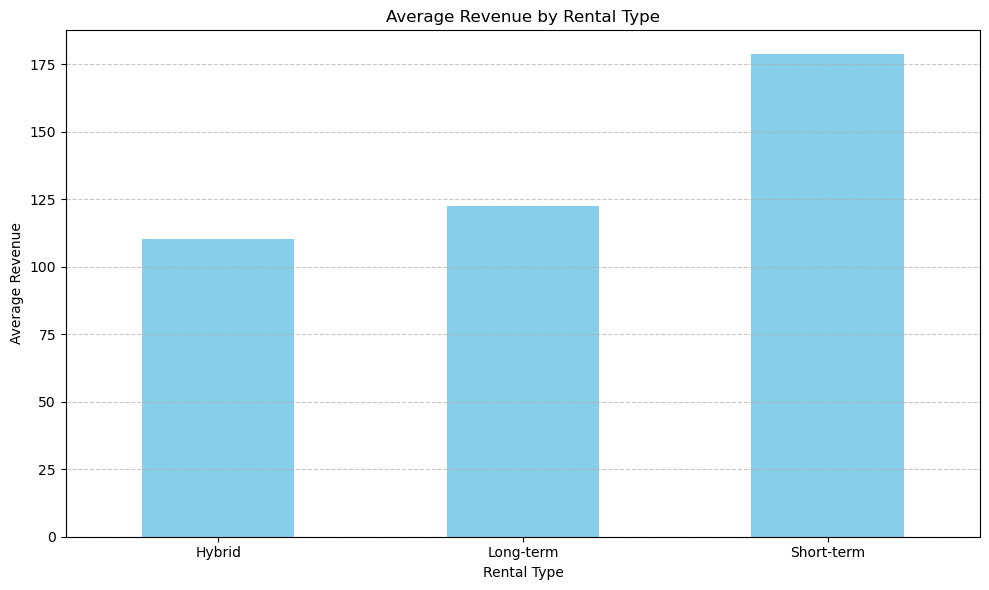

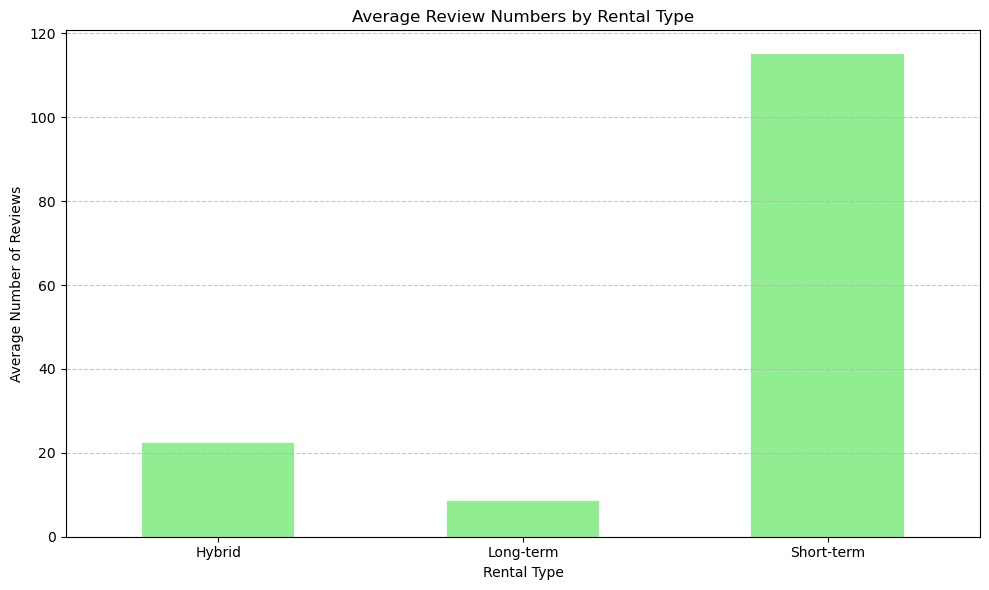

In [4]:
# Define thresholds for short-term and long-term rentals
short_term_threshold = 30
long_term_threshold = 180

# Categorize rentals based on minimum nights
def categorize_rentals(min_nights):
    if min_nights < short_term_threshold:
        return 'Short-term'
    elif min_nights > long_term_threshold:
        return 'Long-term'
    else:
        return 'Hybrid'

# Apply categorization function to create a new column
data['rental_type'] = data['minimum_nights'].apply(categorize_rentals)

# Analyzing revenue by rental type
revenue_by_type = data.groupby('rental_type')['price'].mean()

# Analyzing average review numbers by rental type
avg_reviews_by_type = data.groupby('rental_type')['number_of_reviews'].mean()

# Analyzing review scores by rental type

data['reviews_per_month'] = data['reviews_per_month'].astype(float)
review_scores_by_type = data.groupby('rental_type')['reviews_per_month'].mean()


# Plot histogram of minimum nights
plt.figure(figsize=(10, 6))
plt.hist(data['minimum_nights'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot scatterplot of nights vs prices
plt.figure(figsize=(10, 6))
plt.scatter(data['minimum_nights'], data['price'], alpha=0.5, color='green')
plt.title('Scatterplot of Nights vs Prices')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plotting revenue by rental type
plt.figure(figsize=(10, 6))
revenue_by_type.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Rental Type')
plt.xlabel('Rental Type')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting average review numbers by rental type
plt.figure(figsize=(10, 6))
avg_reviews_by_type.plot(kind='bar', color='lightgreen')
plt.title('Average Review Numbers by Rental Type')
plt.xlabel('Rental Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




## qst 2 - What features significantly influence property prices, and how can the company optimize these factors for competitive pricing?

Mean Squared Error: 59409.644469253144
R-squared Score: 0.7215888961810695


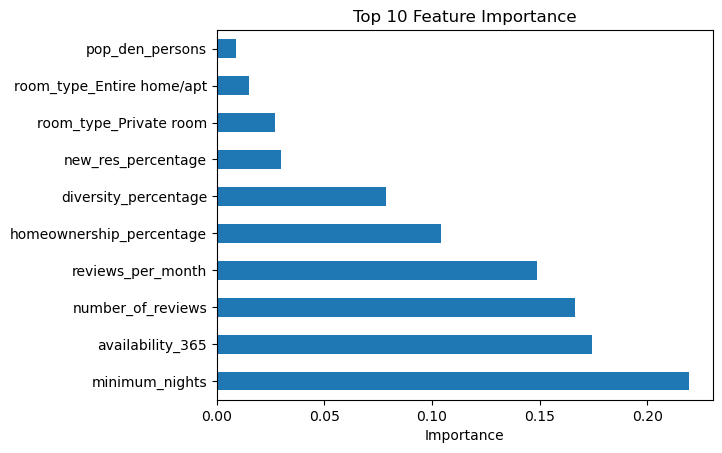

In [48]:
# List of percentage variables to convert
percentage_vars = ['homeownership_percentage', 'diversity_percentage', 'poverty_percentage', 'trees_percentage', 
                    'college_percentage', 'new_res_percentage', 'voting_percentage']

# Remove '%' and convert to float
for var in percentage_vars:
    data[var] = data[var].str.replace('%', '').astype(float) / 100.0

selected_features = ['homeownership_percentage', 'diversity_percentage', 'poverty_percentage', 'trees_percentage', 
                     'college_percentage', 'pop_den_persons', 'tot_res_pesons', 'new_res_percentage',
                     'voting_percentage', 'room_type', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'availability_365']
X = pd.get_dummies(data[selected_features])
data['price'].fillna(data['price'].mean(), inplace=True)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with fewer estimators
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

# Plot feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()


### qst 3: should the company invest in single-unit (house) or multi-unit (apartment) rentals to maximize profitability

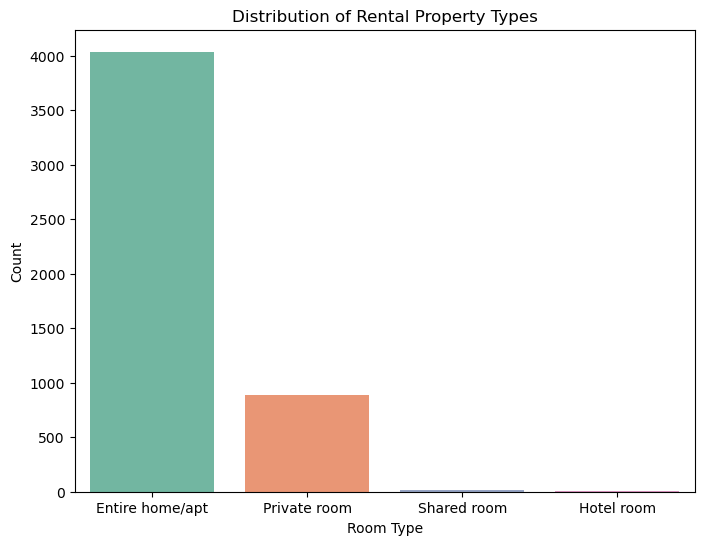

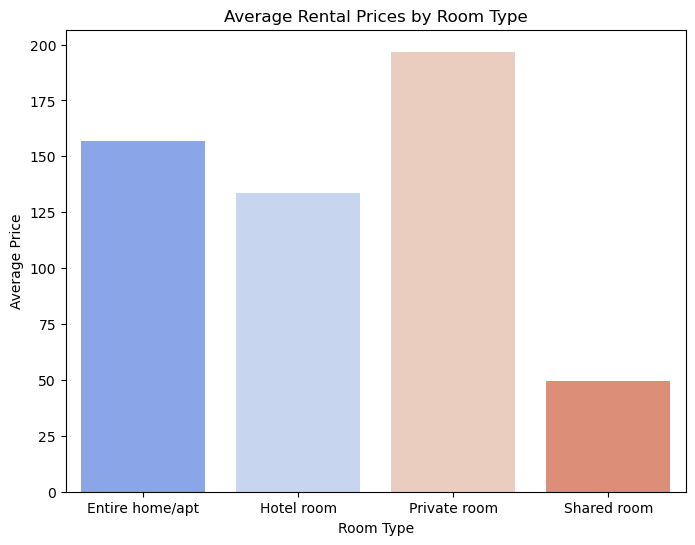

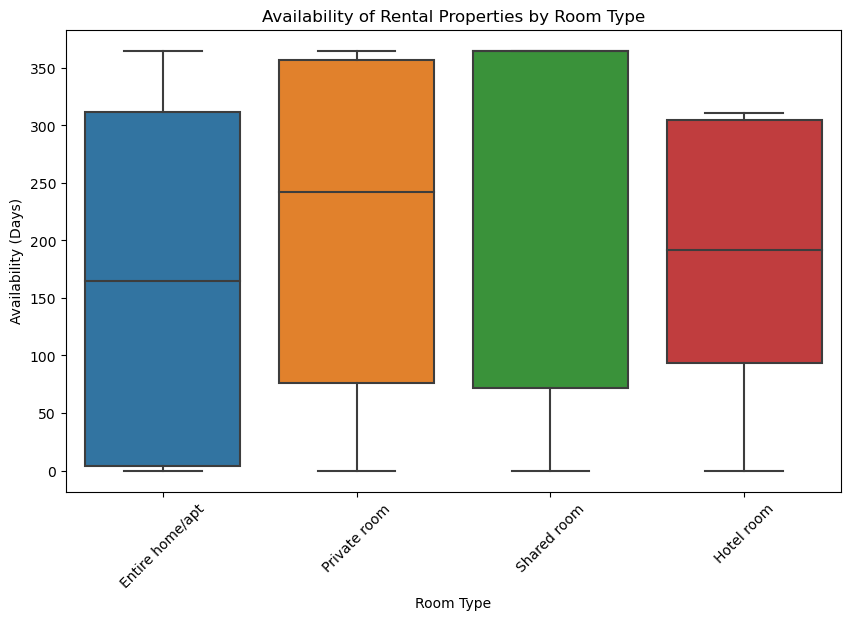

In [5]:
# Plotting the distribution of room types
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=data, palette='Set2')
plt.title('Distribution of Rental Property Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


# Calculate average rental prices for single-unit and multi-unit rentals
avg_price_by_room_type = data.groupby('room_type')['price'].mean().reset_index()

# Plot average rental prices by room type
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type', y='price', data=avg_price_by_room_type, palette='coolwarm')
plt.title('Average Rental Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

# Plotting availability by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='availability_365', data=data)
plt.title('Availability of Rental Properties by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (Days)')
plt.xticks(rotation=45)
plt.show()


### qst 4. Are there specific locations in Portland with notably higher demand for rentals

Distribution of Rentals by Neighborhood:
               Neighborhood  Number of Rentals
0        Northwest District                269
1                  Richmond                265
2                   Buckman                212
3         Portland Downtown                189
4                 Concordia                170
..                      ...                ...
87             Collins View                  6
88                Crestwood                  5
89                 Glenfair                  4
90               Sunderland                  4
91  Ardenwald-Johnson Creek                  2

[92 rows x 2 columns]

Average Rental Prices by Neighborhood:
         Neighborhood  Average Price
66  Portland Downtown     566.735135
13            Buckman     524.867647
25        Forest Park     263.000000
79    Southwest Hills     240.837838
39          Irvington     232.471910
..                ...            ...
27           Glenfair      83.250000
82             Sumner      83.222222

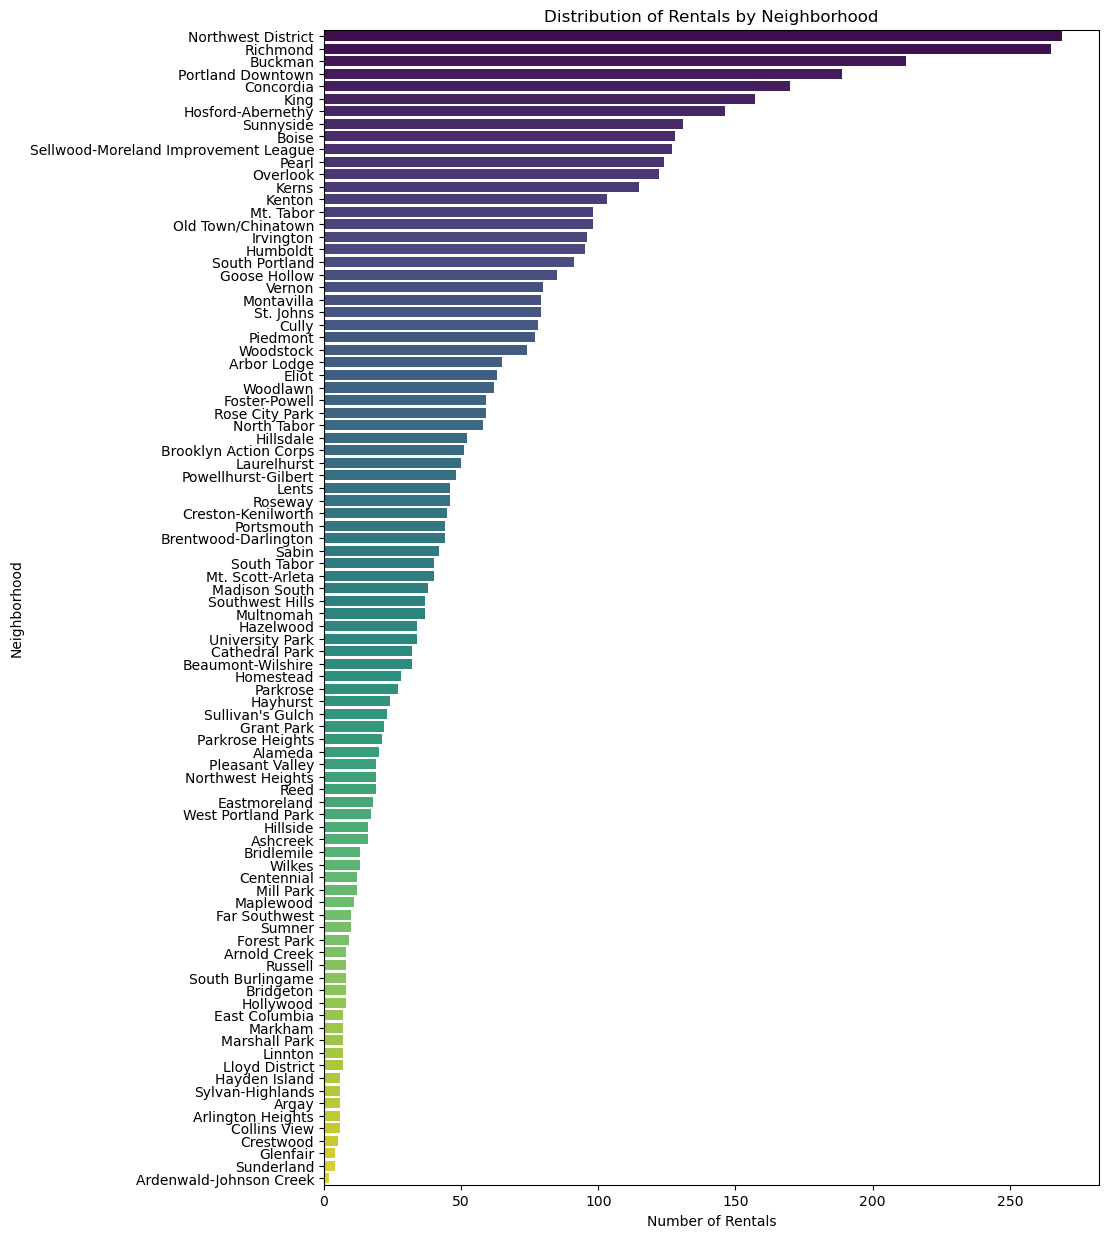

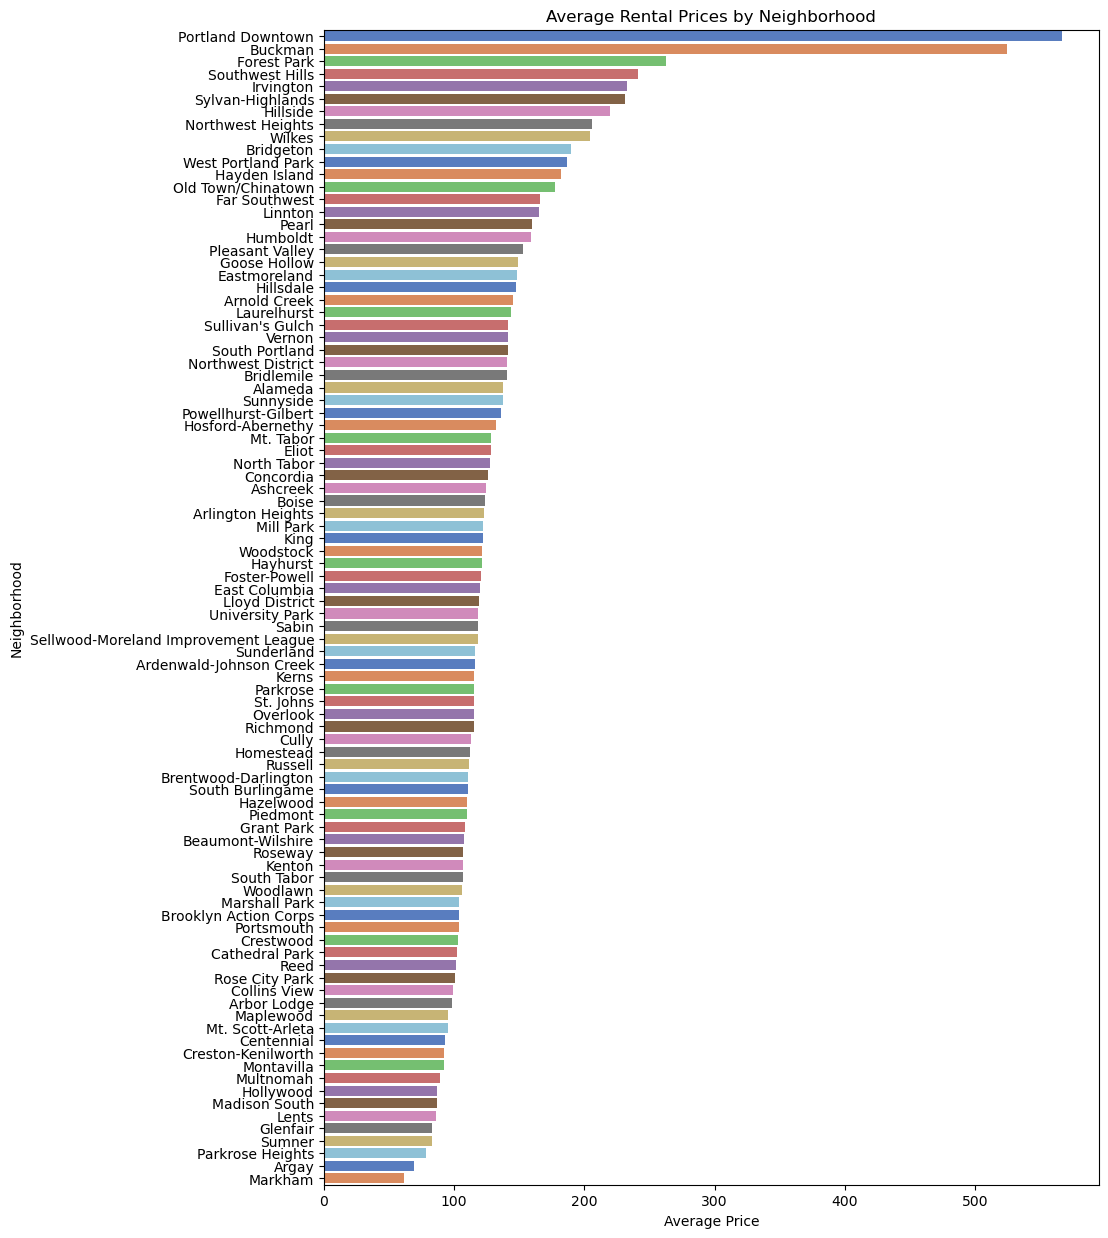

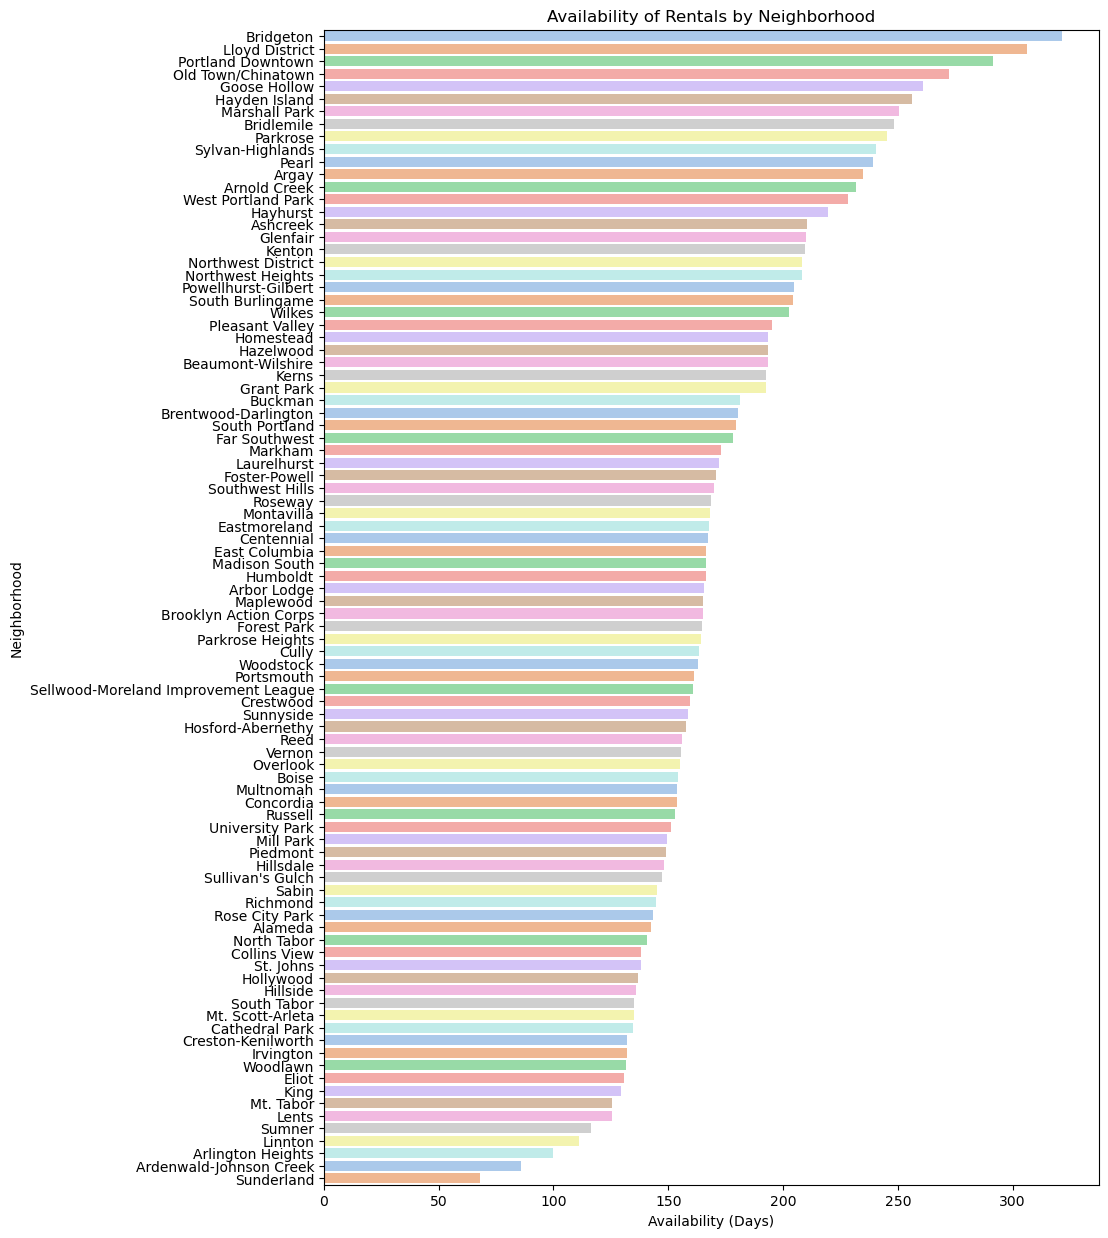

TypeError: Could not convert 196%196%196%196%196%196%196%196%196%196%196%196%196%196%196%196%196%196%196%196% to numeric

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Rentals by Neighborhood
rentals_distribution = data['neighbourhood'].value_counts().reset_index()
rentals_distribution.columns = ['Neighborhood', 'Number of Rentals']

# Average Rental Prices by Neighborhood
average_prices_by_neighborhood = data.groupby('neighbourhood')['price'].mean().reset_index().sort_values(by='price', ascending=False)
average_prices_by_neighborhood.columns = ['Neighborhood', 'Average Price']

# Average Availability by Neighborhood
data['reviews_per_month'] = data['availability_365'].astype(float)
average_availability_by_neighborhood = data.groupby('neighbourhood')['availability_365'].mean().reset_index().sort_values(by='availability_365', ascending=False)
average_availability_by_neighborhood.columns = ['Neighborhood', 'Average Availability']


# Displaying the tables
print("Distribution of Rentals by Neighborhood:")
print(rentals_distribution)
print("\nAverage Rental Prices by Neighborhood:")
print(average_prices_by_neighborhood)
print("\nAverage Availability by Neighborhood:")
print(average_availability_by_neighborhood)


# Plotting the distribution of rentals by neighborhood
plt.figure(figsize=(10, 15))
sns.barplot(x='Number of Rentals', y='Neighborhood', data=rentals_distribution, palette='viridis')
plt.title('Distribution of Rentals by Neighborhood')
plt.xlabel('Number of Rentals')
plt.ylabel('Neighborhood')
plt.show()

# Plotting average rental prices by neighborhood
plt.figure(figsize=(10, 15))
sns.barplot(x='Average Price', y='Neighborhood', data=average_prices_by_neighborhood, palette='muted')
plt.title('Average Rental Prices by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

# Plotting availability of rentals by neighborhood
plt.figure(figsize=(10, 15))
sns.barplot(x='Average Availability', y='Neighborhood', data=average_availability_by_neighborhood, palette='pastel')
plt.title('Availability of Rentals by Neighborhood')
plt.xlabel('Availability (Days)')
plt.ylabel('Neighborhood')
plt.show()

##show most attractive locations based on economic/ demographic vars
data['svt_index'] = data['svt_index'].astype(float)
data['pop_den_persons'] = data['pop_den_persons'].astype(float)
data['tot_res_pesons'] = data['tot_res_pesons'].astype(float)

# Aggregate data by neighborhood
neighborhood_data = data.groupby('neighbourhood').agg({
    'homeownership_percentage': 'mean',
    'diversity_percentage': 'mean',
    'poverty_percentage': 'mean',
    'trees_percentage': 'mean',
    'college_percentage': 'mean',
    'svt_index': 'mean',
    'pop_den_persons': 'mean',
    'tot_res_pesons': 'mean',
    'new_res_percentage': 'mean',
    'voting_percentage': 'mean',
    'price': 'mean'
}).reset_index()

# Rank neighborhoods based on aggregated variables
neighborhood_data['attractiveness_score'] = (
    neighborhood_data['homeownership_percentage'] +
    neighborhood_data['diversity_percentage'] +
    (100 - neighborhood_data['poverty_percentage']) +
    neighborhood_data['trees_percentage'] +
    neighborhood_data['college_percentage'] +
    (100 - neighborhood_data['svt_index']) +
    neighborhood_data['pop_den_persons'] +
    neighborhood_data['tot_res_pesons'] +
    neighborhood_data['new_res_percentage'] +
    neighborhood_data['voting_percentage']
)

# Sort neighborhoods by attractiveness score
neighborhood_data = neighborhood_data.sort_values(by='attractiveness_score', ascending=False)

# Visualization - Bar chart of top 10 neighborhoods
plt.figure(figsize=(12, 8))
sns.barplot(x='attractiveness_score', y='neighbourhood', data=neighborhood_data.head(10), palette='viridis')
plt.title('Top 10 Most Attractive Neighborhoods in Portland')
plt.xlabel('Attractiveness Score')
plt.ylabel('Neighborhood')
plt.show()


### qst 5. What is the ideal minimum stay length for maximizing occupancy rates and revenue

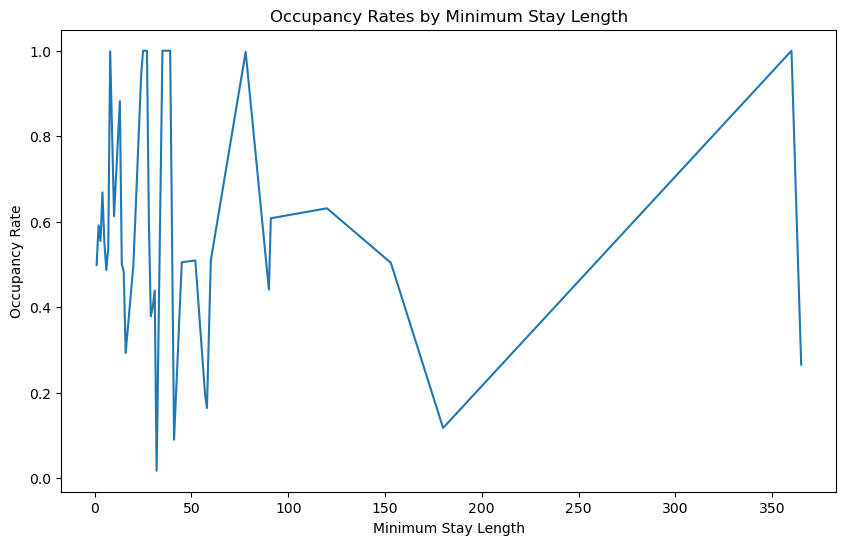

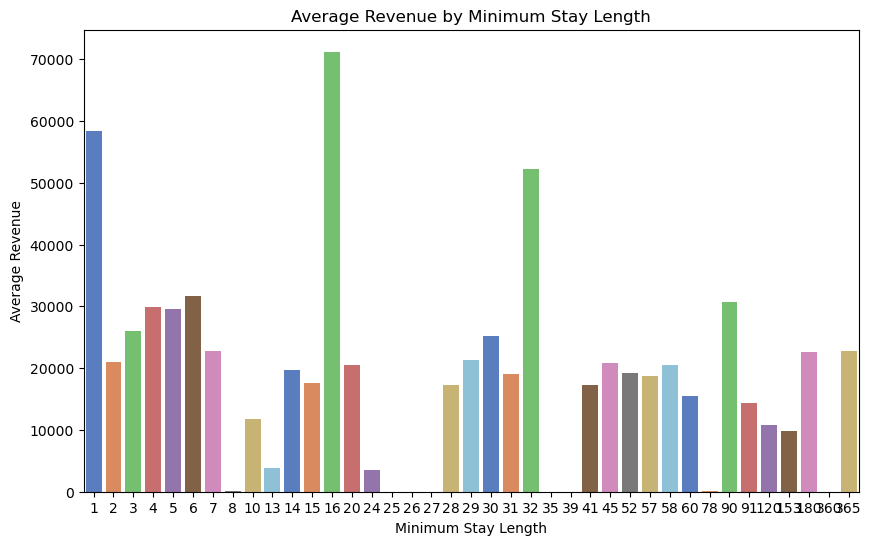

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Occupancy Rates by Minimum Stay Length
occupancy_data = data.groupby('minimum_nights')['availability_365'].apply(lambda x: (365 - x.mean()) / 365).reset_index()
occupancy_data.columns = ['Minimum Stay Length', 'Occupancy Rate']

# Analyze Average Revenue by Minimum Stay Length
average_revenue_data = data.groupby('minimum_nights').apply(lambda x: (x['price'] * x['availability_365']).sum() / len(x)).reset_index()
average_revenue_data.columns = ['Minimum Stay Length', 'Average Revenue']

# Visualize Occupancy Rates
plt.figure(figsize=(10, 6))
sns.lineplot(x='Minimum Stay Length', y='Occupancy Rate', data=occupancy_data)
plt.title('Occupancy Rates by Minimum Stay Length')
plt.xlabel('Minimum Stay Length')
plt.ylabel('Occupancy Rate')
plt.show()

# Visualize Average Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Minimum Stay Length', y='Average Revenue', data=average_revenue_data, palette='muted')
plt.title('Average Revenue by Minimum Stay Length')
plt.xlabel('Minimum Stay Length')
plt.ylabel('Average Revenue')
plt.show()


### qst 6. To what extent do customer reviews impact rental pricing, and how can the company leverage positive reviews for pricing strategies?

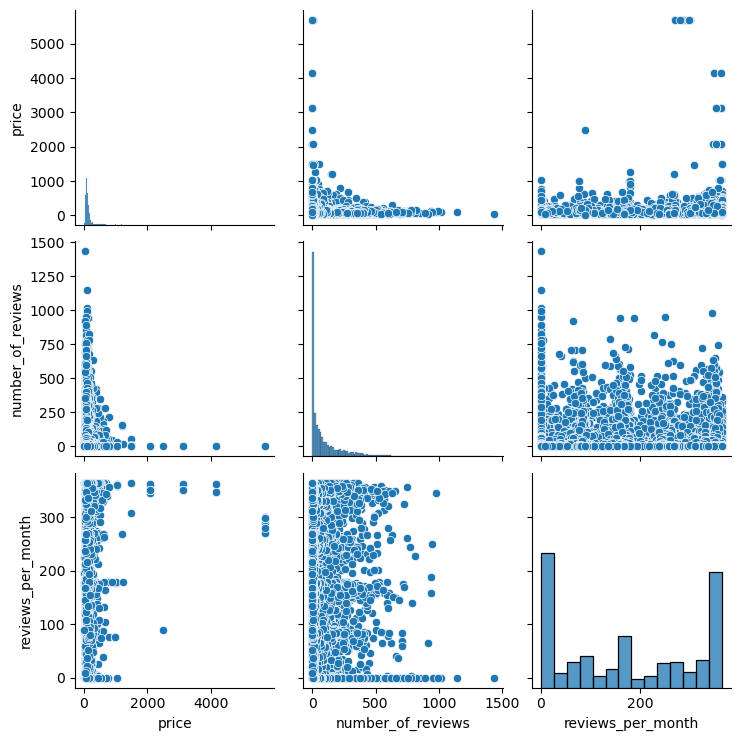

                      price  number_of_reviews  reviews_per_month
price              1.000000          -0.091715           0.100879
number_of_reviews -0.091715           1.000000          -0.177402
reviews_per_month  0.100879          -0.177402           1.000000


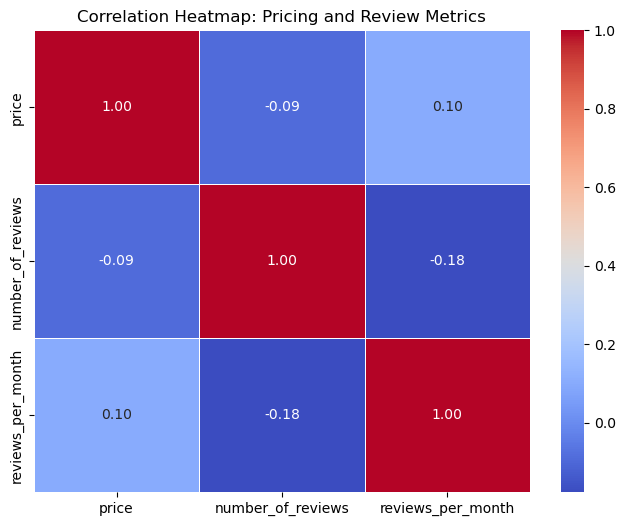

             Feature  Coefficient
0  number_of_reviews    -0.192708
1  reviews_per_month     0.223063


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Exploratory Data Analysis (EDA)
# Visualize the distribution of pricing and review-related metrics
sns.pairplot(data[['price', 'number_of_reviews', 'reviews_per_month']])
plt.show()

# 3. Correlation Analysis
correlation_data = data[['price', 'number_of_reviews', 'reviews_per_month']].corr()
print(correlation_data)

# Visualize Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Pricing and Review Metrics')
plt.show()

# 4. Regression Analysis
X = data[[ 'number_of_reviews', 'reviews_per_month']]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Get Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

